In [242]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,load_img
%matplotlib inline

In [234]:
print(os.listdir("../chest_xray"))

print(os.listdir("../chest_xray/train"))

print(os.listdir("../chest_xray/train/"))

['.DS_Store', '.ipynb_checkpoints', 'test', 'train', 'Untitled.ipynb', 'val']
['.DS_Store', 'NORMAL', 'PNEUMONIA']
['.DS_Store', 'NORMAL', 'PNEUMONIA']


In [235]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('../chest_xray/train/NORMAL/' + img_name)

In [236]:
img_name1 = 'person1000_bacteria_2931.jpeg'
img_bacteria = load_img('../chest_xray/train/PNEUMONIA/' + img_name1)

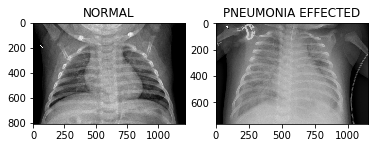

In [245]:
#Visualizing one normal and one  pneumonia X-Ray Image from training Data

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img_normal)
a.set_title('NORMAL')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img_bacteria)
imgplot.set_clim(0.0, 0.7)
a.set_title('PNEUMONIA EFFECTED')

plt.show()

In [238]:
normal_img = os.listdir("../chest_xray/train/NORMAL/")
bacteria_img = os.listdir("../chest_xray/train/PNEUMONIA/")

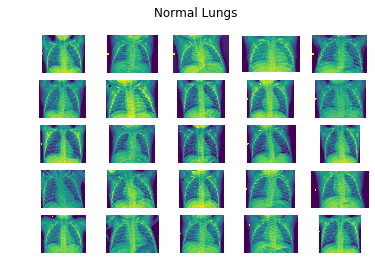

In [249]:
#Visualizing 25 normal  X-Ray Images from training Data
import random
random = random.sample(normal_img,25)
f,ax = plt.subplots(5,5)

for i in range(0,25):
    im = plt.imread('../chest_xray/train/NORMAL/'+random[i])
    ax[i//5,i%5].imshow(im)
    ax[i//5,i%5].axis('off')
f.suptitle('Normal Lungs')
plt.show()

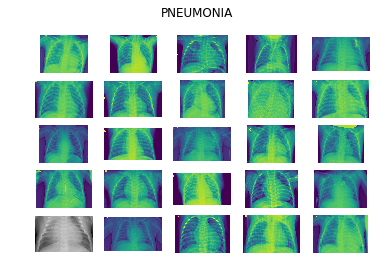

In [250]:
#Visualizing 25 PNEUMONIA  X-Ray Images from training Data
import random
random = random.sample(bacteria_img,25)
f,ax = plt.subplots(5,5)

for i in range(0,25):
    im = plt.imread('../chest_xray/train/PNEUMONIA//'+random[i])
    ax[i//5,i%5].imshow(im)
    ax[i//5,i%5].axis('off')
f.suptitle('PNEUMONIA')
plt.show()

In [298]:
normal_img_train = os.listdir("../chest_xray/train/NORMAL/")
bacteria_img_train = os.listdir("../chest_xray/train/PNEUMONIA/")
normal_img_val = os.listdir("../chest_xray/val/NORMAL/")
bacteria_img_val = os.listdir("../chest_xray/val/PNEUMONIA/")
normal_img_test = os.listdir("../chest_xray/test/NORMAL/")
bacteria_img_test = os.listdir("../chest_xray/test/PNEUMONIA/")


a = np.array((normal_img_train)).shape[0] +  np.array((bacteria_img_train)).shape[0]
b = np.array(normal_img_val).shape[0] + np.array(bacteria_img_val).shape[0]
c = np.array(normal_img_test).shape[0] + np.array(bacteria_img_test).shape[0]
d = a +b+ c                        

(-1.1395206536057336,
 1.0723285996440692,
 -1.204223161574801,
 1.2039173601283644)

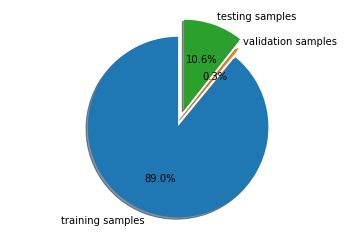

In [299]:
#Pie chart of Images Data

labels = 'training samples','validation samples','testing samples'
sizes = [a,b,c]
explode = (0.1,0, 0.1)
fig1 ,ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

Text(0, 0.5, 'Number of Images')

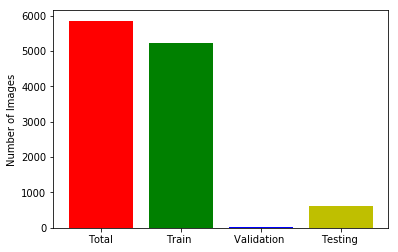

In [304]:
#Bar plot of Images Data

fig,ax = plt.subplots()
r = np.arange(1,5)
total,train,val,test = plt.bar(r,[d,a,b,c])
total.set_facecolor('r')
train.set_facecolor('g')
val.set_facecolor('b')
test.set_facecolor('y')
ax.set_xticks(r)
ax.set_xticklabels(['Total','Train ','Validation ','Testing '])
ax.set_ylabel('Number of Images')

In [251]:
img_width, img_height = 150,150

In [274]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

#Benchmark Model



model = Sequential()
#Adding Convolution Layer
model.add(Conv2D(32, (3, 3), input_shape=(img_width,img_height,3)))
model.add(Activation('relu'))

#Adding MaxPooling Layer
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())

#Dense Layers
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))

"\n\nmodel = Sequential()\nmodel.add(Conv2D(32, (3, 3), input_shape=(img_width,img_height,3)))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=2))\nmodel.add(Flatten())\nmodel.add(Dense(64))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(1))\nmodel.add(Activation('softmax'))"

In [253]:
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

In [254]:
train_data = '../chest_xray/train'
validation_data = '../chest_xray/val'
test_data = '../chest_xray/test'

In [255]:
nb_train_samples = 5217
nb_validation_samples = 17
epochs = 10
batch_size = 16

In [308]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [257]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [258]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [259]:
validation_generator = test_datagen.flow_from_directory(
    validation_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [260]:
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [261]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_62 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 175232)            0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)                11214912  
_________________________________________________________________
activation_63 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
__________

In [213]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
326/326 [==============================] - 307s 942ms/step - loss: 4.0987 - acc: 0.7429 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/10
326/326 [==============================] - 298s 915ms/step - loss: 4.0987 - acc: 0.7429 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/10
326/326 [==============================] - 301s 925ms/step - loss: 4.0987 - acc: 0.7429 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/10
326/326 [==============================] - 300s 921ms/step - loss: 4.0987 - acc: 0.7429 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 5/10
326/326 [==============================] - 300s 922ms/step - loss: 4.0987 - acc: 0.7429 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 6/10
326/326 [==============================] - 304s 932ms/step - loss: 4.0987 - acc: 0.7429 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 7/10
326/326 [==============================] - 317s 972ms/step - loss: 4.0987 - acc: 0.7429 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 8/10
326/326 [============================

In [215]:
test_accu = model.evaluate_generator(test_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 62.5 %


In [284]:
img_width, img_height = 64,64
batch_size = 32

In [310]:
model_2 = Sequential()
#First Convolution Layer
model_2.add(Conv2D(32, (3, 3), input_shape=(img_width,img_height,3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=2))

#Second Convolution Layer

model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))



#Dense Layers


model_2.add(Flatten())
model_2.add(Dense(128))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1))
model_2.add(Activation('sigmoid'))

In [309]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
    validation_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [287]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_73 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_74 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 6272)              0         
__________

In [312]:
model_2.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [289]:
model_2.fit_generator(
    train_generator,
    steps_per_epoch=163,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=624)

Epoch 1/10
163/163 [==============================] - 457s 3s/step - loss: 0.3901 - acc: 0.8244 - val_loss: 0.3931 - val_acc: 0.8750
Epoch 2/10
163/163 [==============================] - 446s 3s/step - loss: 0.2615 - acc: 0.8932 - val_loss: 0.8757 - val_acc: 0.6250
Epoch 3/10
163/163 [==============================] - 445s 3s/step - loss: 0.2395 - acc: 0.9049 - val_loss: 0.3108 - val_acc: 0.8750
Epoch 4/10
163/163 [==============================] - 454s 3s/step - loss: 0.2010 - acc: 0.9202 - val_loss: 0.3704 - val_acc: 0.7500
Epoch 5/10
163/163 [==============================] - 490s 3s/step - loss: 0.1964 - acc: 0.9208 - val_loss: 0.3298 - val_acc: 0.8125
Epoch 6/10
163/163 [==============================] - 461s 3s/step - loss: 0.1983 - acc: 0.9250 - val_loss: 0.6072 - val_acc: 0.6875
Epoch 7/10
163/163 [==============================] - 463s 3s/step - loss: 0.1687 - acc: 0.9348 - val_loss: 0.5964 - val_acc: 0.6875
Epoch 8/10
163/163 [==============================] - 461s 3s/step - 

In [290]:
test_accu = model_2.evaluate_generator(test_generator,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 85.61010682004931 %


In [303]:
model_2.history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

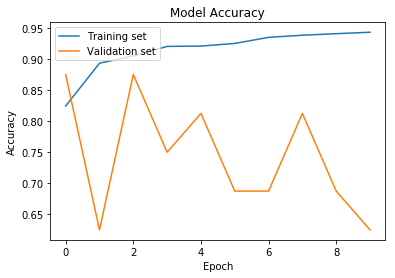

In [295]:
plt.plot(model_2.history.history['acc'])
plt.plot(model_2.history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

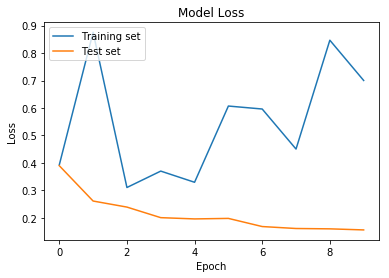

In [296]:
plt.plot(model_2.history.history['val_loss'])
plt.plot(model_2.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()